In [86]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None) #Allows for cell to contain maximum number of columns and rows. 
pd.set_option ('display.max_columns', None)

In [87]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [88]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



<Axes: xlabel='median_house_value', ylabel='Count'>

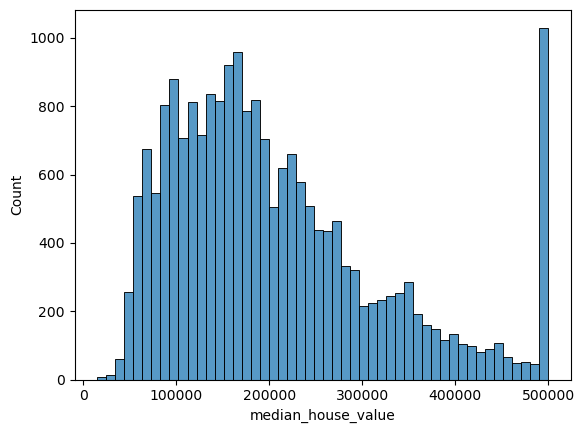

In [89]:
sns.histplot(df.median_house_value, bins=50)

In [90]:
df['house_value'] = np.log1p(df.median_house_value)

<Axes: xlabel='house_value', ylabel='Count'>

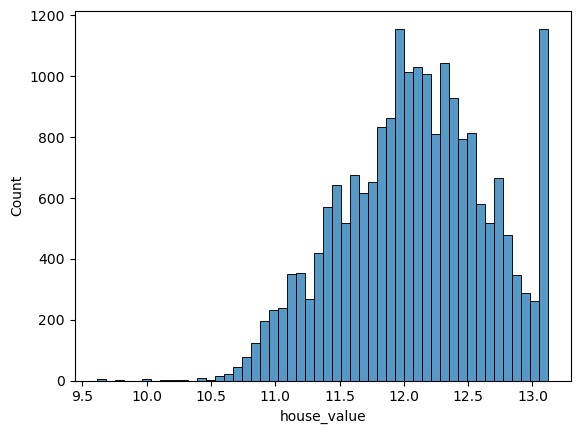

In [91]:
sns.histplot(df.house_value, bins=50)

Long Tailed Distribution but with large increase ar 500,000

In [92]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'house_value'],
      dtype='object')

In [93]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]


In [94]:
df= df[['latitude','longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'house_value']]


In [95]:
df.population.median()

1195.0

In [96]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'house_value'],
      dtype='object')

In [97]:
df['total_bedrooms']=df['total_bedrooms'].fillna(0)

In [98]:
n = len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

In [99]:
n , n_val + n_test + n_train

(15687, 15687)

In [100]:
n_val,n_test,n_train

(3137, 3137, 9413)

In [101]:
idx = np.arange(n)

In [102]:
np.random.seed(42)
np.random.shuffle(idx)

In [103]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [104]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [105]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [106]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [107]:
y_train = (np.log1p(df_train.house_value).values)
y_val = (np.log1p(df_val.house_value).values)
y_test = (np.log1p(df_test.house_value).values)

In [108]:
del df_train['house_value']
del df_val['house_value']
del df_test['house_value']

In [109]:
len(y_train)

9413

In [110]:
df_train.iloc[10]

latitude                36.320
longitude             -119.340
housing_median_age      14.000
total_rooms           1204.000
total_bedrooms         227.000
population             633.000
households             247.000
median_income            3.925
Name: 10, dtype: float64

In [111]:
xi = [36.320,-119.340,14,1204,227,633,247,3.925]
w0 = 7.17
w = [0.05,0.05,1.5,4]


In [112]:
X = [
    [87.120, 61.9640, 3, 204, 227, 100, 500, 310.925],
    [23.820, 59.640, 60, 506, 227, 6, 247, 16.25],
    [6, 19.340, 20, 204, 227, 500, 10, 123.25],
    [35.2, -200.340, 1, 564, 227, 56, 5033, 10.25],
    [786.4, 200.340, 13, 54, 227, 56, 32, 103.925],
    [2, -200.340, 67, 5264, 27, 526, 5103, 110.25],
    [90.3473, -200.340, 123, 54, 2127, 6, 5013, 120.925],
    [1000, 45.354, 56, 64, 227, 5326, 5303, 102.925]
]

X = np.array(X)

y = [10,16,37,27,39,7,5,238]

In [113]:
XTX = X.T.dot(X)

In [114]:
XTX_inv=np.linalg.inv(XTX)

In [115]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0., -0., -0.,  0., -0., -0.,  0.],
       [ 0.,  1., -0., -0.,  0.,  0.,  0.,  0.],
       [ 0., -0.,  1., -0., -0., -0., -0.,  0.],
       [-0., -0.,  0.,  1., -0., -0.,  0.,  0.],
       [ 0., -0.,  0., -0.,  1., -0., -0.,  0.],
       [ 0., -0., -0., -0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0., -0.,  1.,  0.],
       [ 0., -0., -0., -0.,  0.,  0.,  0.,  1.]])

In [116]:
ones=np.ones(X.shape[0])
np.column_stack([ones,X])

array([[ 1.00000e+00,  8.71200e+01,  6.19640e+01,  3.00000e+00,
         2.04000e+02,  2.27000e+02,  1.00000e+02,  5.00000e+02,
         3.10925e+02],
       [ 1.00000e+00,  2.38200e+01,  5.96400e+01,  6.00000e+01,
         5.06000e+02,  2.27000e+02,  6.00000e+00,  2.47000e+02,
         1.62500e+01],
       [ 1.00000e+00,  6.00000e+00,  1.93400e+01,  2.00000e+01,
         2.04000e+02,  2.27000e+02,  5.00000e+02,  1.00000e+01,
         1.23250e+02],
       [ 1.00000e+00,  3.52000e+01, -2.00340e+02,  1.00000e+00,
         5.64000e+02,  2.27000e+02,  5.60000e+01,  5.03300e+03,
         1.02500e+01],
       [ 1.00000e+00,  7.86400e+02,  2.00340e+02,  1.30000e+01,
         5.40000e+01,  2.27000e+02,  5.60000e+01,  3.20000e+01,
         1.03925e+02],
       [ 1.00000e+00,  2.00000e+00, -2.00340e+02,  6.70000e+01,
         5.26400e+03,  2.70000e+01,  5.26000e+02,  5.10300e+03,
         1.10250e+02],
       [ 1.00000e+00,  9.03473e+01, -2.00340e+02,  1.23000e+02,
         5.40000e+01,  2.12700

In [117]:
w_full = XTX_inv.dot(X.T).dot(y)

In [118]:
w_full

array([ 1.68393845, -7.01203736, 13.22398576, -0.25573657, -1.11166922,
       -0.1313018 , -0.21236523,  2.19329154])

In [119]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range (n):
        res = res + w[j] * xi[j]
        
    return res

In [120]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)
    

In [121]:
w_new = [w0] + w

In [122]:
w_new

[7.17, 0.05, 0.05, 1.5, 4]

In [124]:
linear_regression(xi)

IndexError: list index out of range

In [ ]:
np.expm1(17.22534)

In [ ]:
df_train.head()

In [126]:
def linear_regression(X):
    return X.dot(w_new)

In [127]:
# linear_regression(X)

In [128]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [129]:
train_linear_regression(X,y)

(1.6839384545847387,
 array([-7.01203736, 13.22398576, -0.25573657, -1.11166922, -0.1313018 ,
        -0.21236523,  2.19329154]))

In [130]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [131]:
base = ['housing_median_age','total_rooms','total_bedrooms','median_income']

X_train =df_train[base].values
y_train

array([2.49831327, 2.58938944, 2.60060576, ..., 2.64775988, 2.57405279,
       2.60485372])

In [132]:
df_train[base].isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
median_income         0
dtype: int64

In [133]:
w0, w =train_linear_regression(X_train,y_train)

In [134]:
X_train.dot(w)

ValueError: shapes (9413,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)